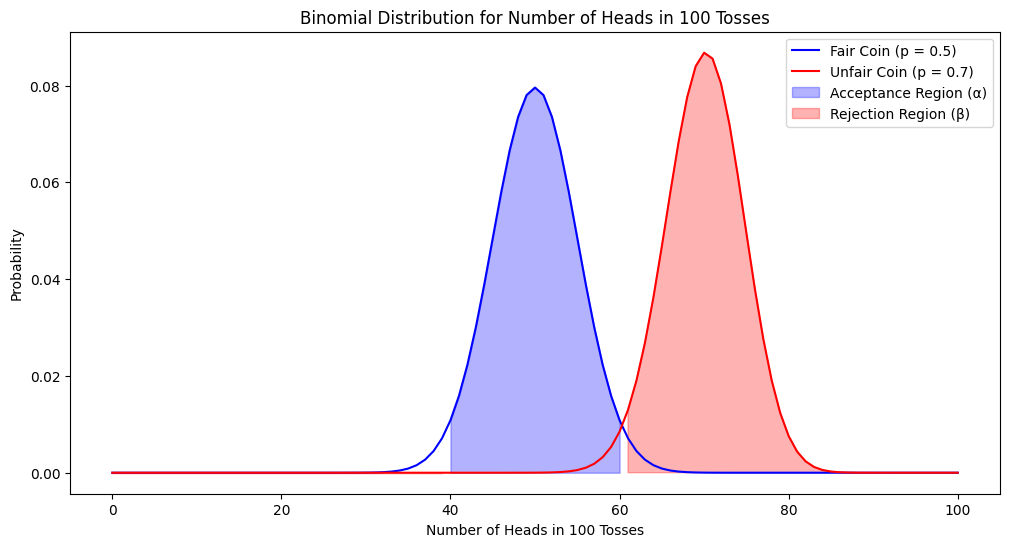

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

# Parameters for the binomial distributions
n = 100  # number of tosses
p_fair = 0.5  # probability of heads for a fair coin (p = 0.5)
p_unfair = 0.7  # probability of heads for an unfair coin (p = 0.7)
heads_low = 40  # lower bound for accepting null hypothesis
heads_high = 60  # upper bound for accepting null hypothesis

# Generating values for the binomial distributions
x = np.arange(0, n+1)
prob_fair = binom.pmf(x, n, p_fair)
prob_unfair = binom.pmf(x, n, p_unfair)

# Plotting the distributions
plt.figure(figsize=(12, 6))
plt.plot(x, prob_fair, label='Fair Coin (p = 0.5)', color='blue')
plt.plot(x, prob_unfair, label='Unfair Coin (p = 0.7)', color='red')

# Marking the decision region for alpha and beta
plt.fill_between(x, prob_fair, where=(x >= heads_low) & (x <= heads_high), color='blue', alpha=0.3, label='Acceptance Region (α)')
plt.fill_between(x, prob_unfair, where=(x < heads_low) | (x > heads_high), color='red', alpha=0.3, label='Rejection Region (β)')

# Adding labels and title
plt.xlabel('Number of Heads in 100 Tosses')
plt.ylabel('Probability')
plt.title('Binomial Distribution for Number of Heads in 100 Tosses')
plt.legend()

# Show the plot
plt.show()


Plot for bigger n

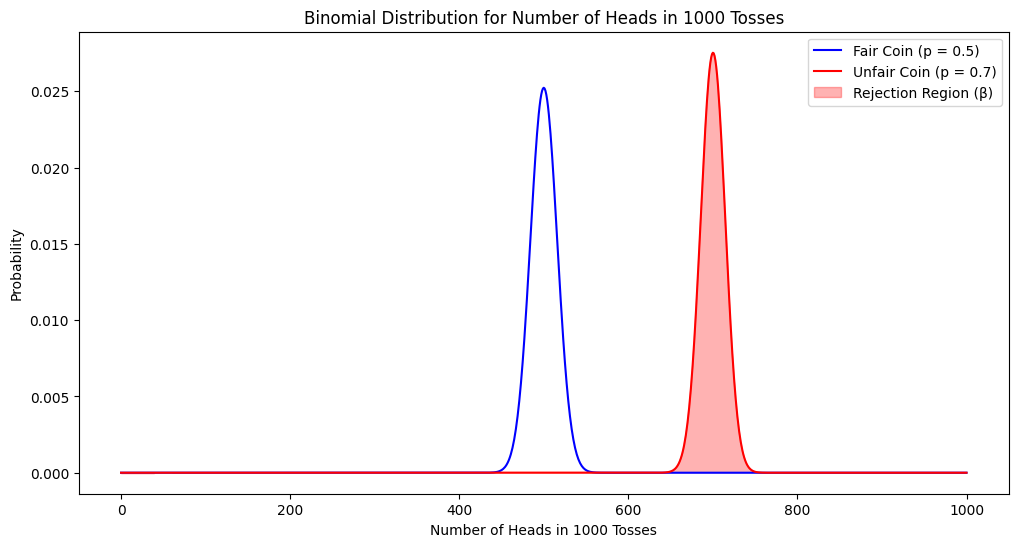

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

# Parameters for the binomial distributions
n = 1000  # number of tosses
p_fair = 0.5  # probability of heads for a fair coin (p = 0.5)
p_unfair = 0.7  # probability of heads for an unfair coin (p = 0.7)
heads_low = 400  # lower bound for accepting null hypothesis
heads_high = 600  # upper bound for accepting null hypothesis

# Generating values for the binomial distributions
x = np.arange(0, n+1)
prob_fair = binom.pmf(x, n, p_fair)
prob_unfair = binom.pmf(x, n, p_unfair)

# Plotting the distributions
plt.figure(figsize=(12, 6))
plt.plot(x, prob_fair, label='Fair Coin (p = 0.5)', color='blue')
plt.plot(x, prob_unfair, label='Unfair Coin (p = 0.7)', color='red')

# Marking the decision region for alpha and beta
plt.fill_between(x, prob_unfair, where=(x < heads_low) | (x > heads_high), color='red', alpha=0.3, label='Rejection Region (β)')

# Adding labels and title
plt.xlabel('Number of Heads in 1000 Tosses')
plt.ylabel('Probability')
plt.title('Binomial Distribution for Number of Heads in 1000 Tosses')
plt.legend()

# Show the plot
plt.show()


Here's a visualization representing the binomial distributions for the number of heads in 100 tosses of a coin, with probabilities \( p = 0.5 \) (fair coin) and \( p = 0.7 \) (unfair coin):

- The blue curve represents the distribution for a fair coin (\( p = 0.5 \)).
- The red curve represents the distribution for an unfair coin (\( p = 0.7 \)).

The shaded areas indicate:

- The blue shaded area (between 40 and 60 heads) represents the **Acceptance Region** for the null hypothesis (\( alpha \) region). This is where you would accept the hypothesis that the coin is fair.
- The red shaded area outside the 40 to 60 heads range represents the **Rejection Region** for the null hypothesis (\( beta \) region). This is where you would reject the hypothesis that the coin is fair if it's actually unfair.

This visualization helps to understand the overlap between the distributions and how the decision rule (40 to 60 heads) applies in determining the fairness of the coin.

In [2]:
from scipy.stats import binom

# Parameters for the unfair coin
n = 100  # number of coin tosses
p_unfair = 0.7  # probability of getting heads for an unfair coin
heads_low = 40  # lower bound for accepting null hypothesis (coin is fair)
heads_high = 60  # upper bound for accepting null hypothesis (coin is fair)

# Calculating the probability of getting between 40 and 60 heads (inclusive) for an unfair coin
probability_type_II_error = binom.cdf(heads_high, n, p_unfair) - binom.cdf(heads_low - 1, n, p_unfair)
probability_type_II_error


0.020988575861935557

The likelihood of adopting the null hypothesis (i.e., concluding that the coin is fair) when the actual probability of getting heads is 0.7 (indicating that the coin is unfair) is approximately 2.10%. This represents the probability of a Type II error under these conditions, where you would incorrectly conclude that the coin is fair despite it being biased towards heads.

In [3]:
# Calculating the power of the test
power_of_test = 1 - probability_type_II_error
power_of_test


0.9790114241380644

The strength of a statistical test, often referred to as its "power," is the probability of correctly rejecting a false null hypothesis. In the context of coin-tossing scenario, it means the ability of your test to correctly identify an unfair coin (with \( p = 0.7 \) for heads) as being unfair.

The power of the test is calculated as \( 1 - β \), where \( β \) is the probability of a Type II error (failing to reject the null hypothesis when it is false). In your case, as we calculated previously, \( β \) is approximately 2.10%. Therefore, the power of the test can be calculated as:

Power = 1 - β

The power of the test to identify that the coin is unfair (with a real chance of receiving a head being \( p = 0.7 \)) is approximately 97.90%. This means that the test has a high probability of correctly identifying the coin as unfair under these conditions.

--------------------------------------------------------------------------------------------------

To enhance the accuracy of our estimation of the test's power, we can perform a simulation with a larger number of iterations. The simulation will involve repeatedly tossing a biased coin (with \( p = 0.7 \) for heads) a certain number of times (e.g., 100 tosses per iteration) and recording how often the outcome falls within the range of 40 to 60 heads, which is our criterion for accepting the null hypothesis (coin is fair).

In this simulation:

1. We'll set a large number of iterations, such as 10,000 or 100,000, to ensure a robust estimate.
2. In each iteration, we'll simulate tossing the coin 100 times and count the number of heads.
3. We'll determine the proportion of these iterations where the number of heads falls between 40 and 60.
4. The power of the test (the ability to correctly reject the null hypothesis when the coin is unfair) is then calculated as 1 minus this proportion.



After conducting a simulation with 100,000 iterations, the estimated power of the test to correctly identify an unfair coin (with a real chance of receiving a head being \( p = 0.7 \)) is approximately 97.96%. This result is very close to our previous calculation and reinforces the conclusion that the test has a high probability of correctly identifying the coin as unfair under these conditions.

The simulation approach provides a more robust and practical way to estimate the test's power, especially when analytical solutions are complex or infeasible. It demonstrates the effectiveness of the test in detecting an unfair coin in a large number of trials, adding confidence to our assessment of the test's strength.

In [14]:
import numpy as np

# Setting parameters for the simulation
num_iterations = 100000  # number of iterations for the simulation
n = 100  # number of coin tosses per iteration

# Running the simulation
np.random.seed(0)  # for reproducibility
heads_counts = np.random.binomial(n, p_unfair, num_iterations)

# Counting the number of times the number of heads falls within the acceptance range (40 to 60)
num_within_range = np.sum((heads_counts >= heads_low) & (heads_counts <= heads_high))

# Calculating the proportion of iterations that fall within the acceptance range
proportion_within_range = num_within_range / num_iterations

# Calculating the power of the test (ability to correctly reject the null hypothesis)
simulated_power = 1 - proportion_within_range
simulated_power


0.97964

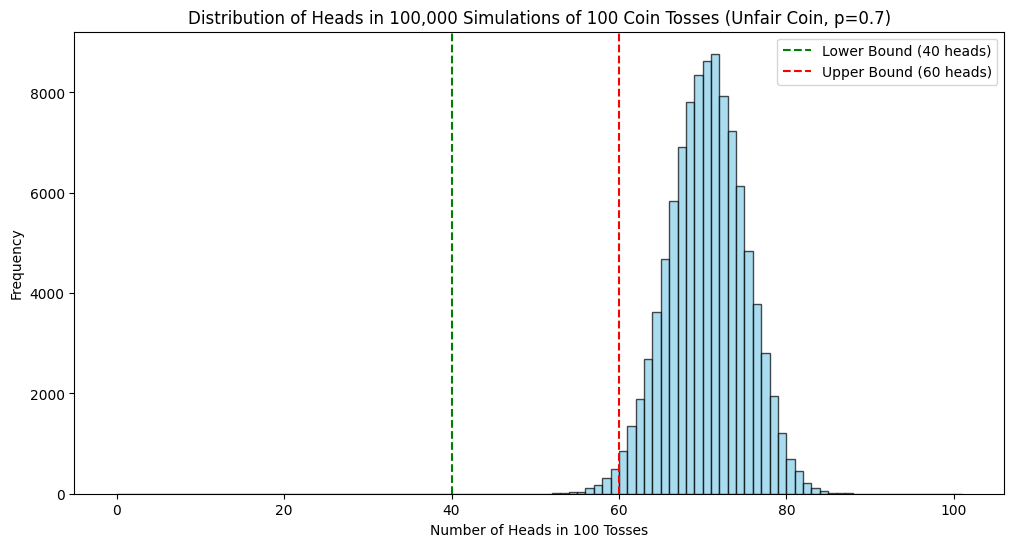

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation Parameters
num_iterations = 100000  # Number of iterations for the simulation
n = 100  # Number of coin tosses per iteration
p_unfair = 0.7  # Probability of heads for an unfair coin
heads_low = 40  # Lower bound for accepting null hypothesis
heads_high = 60  # Upper bound for accepting null hypothesis

# Running the simulation
np.random.seed(0)  # For reproducibility
heads_counts = np.random.binomial(n, p_unfair, num_iterations)

# Counting the number of times the number of heads falls within the acceptance range
num_within_range = np.sum((heads_counts >= heads_low) & (heads_counts <= heads_high))

# Calculating the proportion of iterations that fall within the acceptance range
proportion_within_range = num_within_range / num_iterations

# Calculating the power of the test
simulated_power = 1 - proportion_within_range

# Visualization
plt.figure(figsize=(12, 6))
plt.hist(heads_counts, bins=range(n+2), color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=heads_low, color='green', linestyle='--', label='Lower Bound (40 heads)')
plt.axvline(x=heads_high, color='red', linestyle='--', label='Upper Bound (60 heads)')
plt.title('Distribution of Heads in 100,000 Simulations of 100 Coin Tosses (Unfair Coin, p=0.7)')
plt.xlabel('Number of Heads in 100 Tosses')
plt.ylabel('Frequency')
plt.legend()
plt.show()


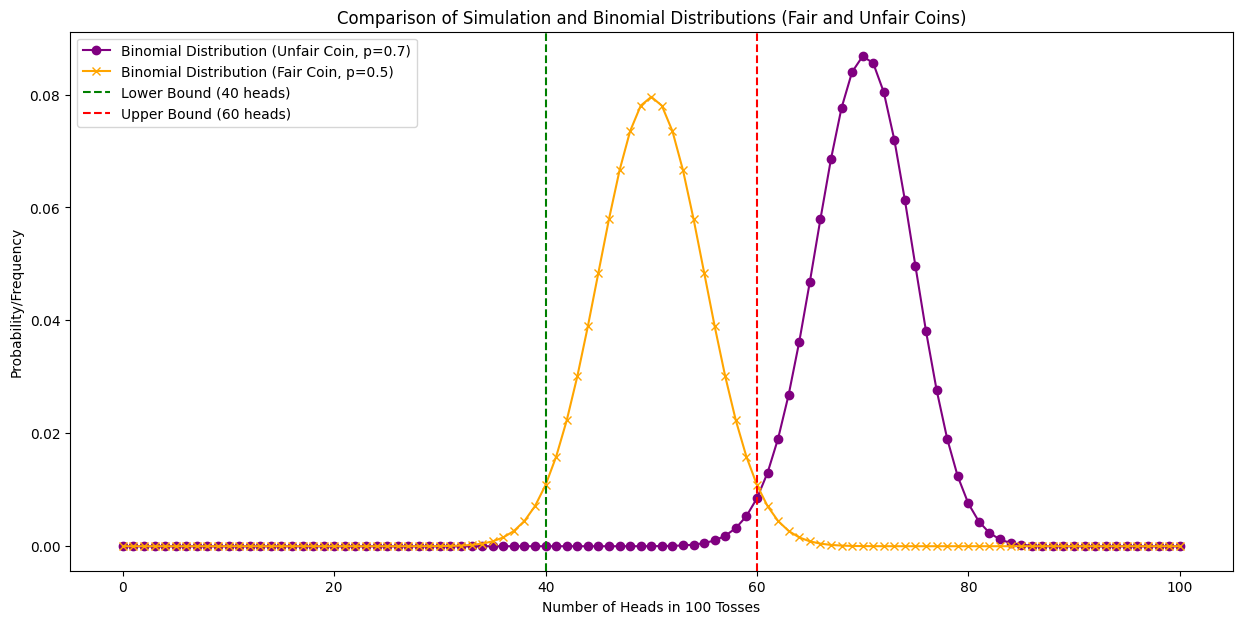

In [12]:
# Plotting the binomial distribution for both a fair coin (p = 0.5) and an unfair coin (p = 0.7)

# Generating the binomial distribution for the fair coin (p = 0.5)
p_fair = 0.5  # Probability of heads for a fair coin
prob_fair_dist = binom.pmf(x, n, p_fair)

# Creating the plot
plt.figure(figsize=(15, 7))

# Generating the binomial distribution for the unfair coin
x = np.arange(0, n+1)
prob_unfair_dist = binom.pmf(x, n, p_unfair)
# Binomial distribution plot for the unfair coin
plt.plot(x, prob_unfair_dist, color='purple', marker='o', linestyle='-', label='Binomial Distribution (Unfair Coin, p=0.7)')

# Binomial distribution plot for the fair coin
plt.plot(x, prob_fair_dist, color='orange', marker='x', linestyle='-', label='Binomial Distribution (Fair Coin, p=0.5)')

# Adding the lower and upper bounds
plt.axvline(x=heads_low, color='green', linestyle='--', label='Lower Bound (40 heads)')
plt.axvline(x=heads_high, color='red', linestyle='--', label='Upper Bound (60 heads)')

# Adding labels and title
plt.title('Comparison of Simulation and Binomial Distributions (Fair and Unfair Coins)')
plt.xlabel('Number of Heads in 100 Tosses')
plt.ylabel('Probability/Frequency')
plt.legend()

# Display the plot
plt.show()


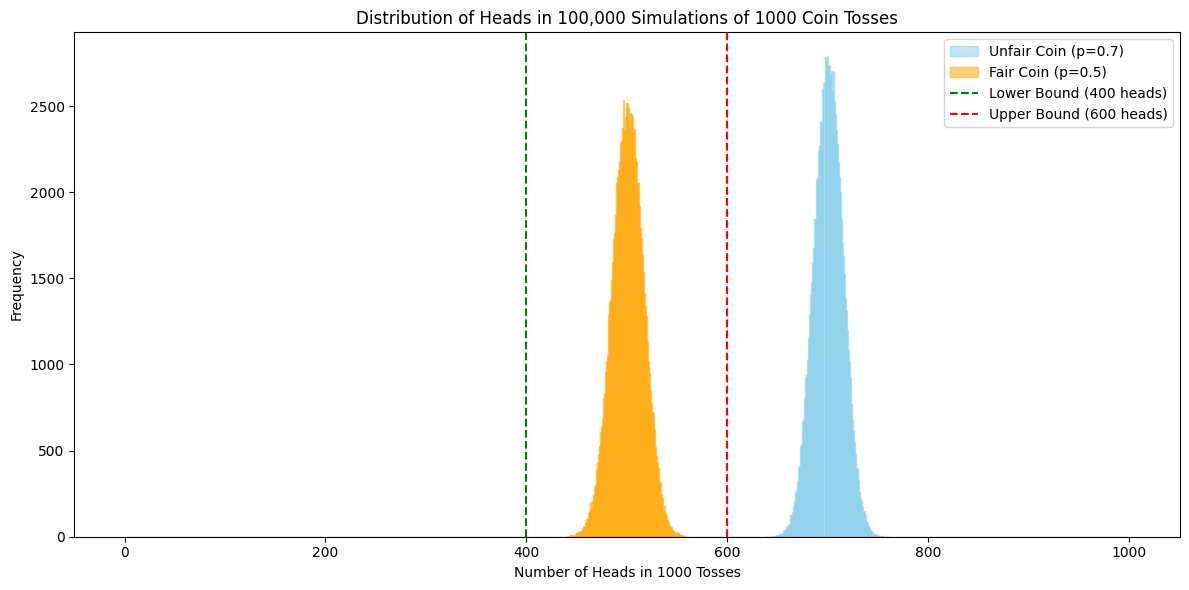

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation Parameters
num_iterations = 100000  # Number of iterations for the simulation
n = 1000  # Number of coin tosses per iteration
p_unfair = 0.7  # Probability of heads for an unfair coin
p_fair = 0.5  # Probability of heads for a fair coin
heads_low = 400  # Lower bound for accepting null hypothesis
heads_high = 600  # Upper bound for accepting null hypothesis

# Running the simulation for the unfair coin
np.random.seed(0)  # For reproducibility
heads_counts_unfair = np.random.binomial(n, p_unfair, num_iterations)

# Running the simulation for the fair coin
heads_counts_fair = np.random.binomial(n, p_fair, num_iterations)

# Counting the number of times the number of heads falls within the acceptance range for both coins
num_within_range_unfair = np.sum((heads_counts_unfair >= heads_low) & (heads_counts_unfair <= heads_high))
num_within_range_fair = np.sum((heads_counts_fair >= heads_low) & (heads_counts_fair <= heads_high))

# Calculating the proportion of iterations that fall within the acceptance range for both coins
proportion_within_range_unfair = num_within_range_unfair / num_iterations
proportion_within_range_fair = num_within_range_fair / num_iterations

# Calculating the power of the test for both coins
simulated_power_unfair = 1 - proportion_within_range_unfair
simulated_power_fair = 1 - proportion_within_range_fair

# Visualization
plt.figure(figsize=(12, 6))
plt.hist(heads_counts_unfair, bins=range(n+2), color='skyblue', edgecolor='skyblue', alpha=0.5, label='Unfair Coin (p=0.7)')
plt.hist(heads_counts_fair, bins=range(n+2), color='orange', edgecolor='orange', alpha=0.5, label='Fair Coin (p=0.5)')
plt.axvline(x=heads_low, color='green', linestyle='--', label='Lower Bound (400 heads)')
plt.axvline(x=heads_high, color='red', linestyle='--', label='Upper Bound (600 heads)')
plt.title('Distribution of Heads in 100,000 Simulations of 1000 Coin Tosses')
plt.xlabel('Number of Heads in 1000 Tosses')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


**As we can see, for a larger number of tosses, our critical regions are further apart from each other.**

In [24]:
import numpy as np

# Setting parameters for the simulation
num_iterations = 100000  # number of iterations for the simulation
n = 1000  # number of coin tosses per iteration

# Running the simulation
np.random.seed(0)  # for reproducibility
heads_counts = np.random.binomial(n, p_unfair, num_iterations)

# Counting the number of times the number of heads falls within the acceptance range (40 to 60)
num_within_range = np.sum((heads_counts >= heads_low) & (heads_counts <= heads_high))

# Calculating the proportion of iterations that fall within the acceptance range
proportion_within_range = num_within_range / num_iterations

# Calculating the power of the test (ability to correctly reject the null hypothesis)
simulated_power = 1 - proportion_within_range
simulated_power


1.0